In [1]:
import os
import glob
import numpy as np
import nibabel as nib
import pandas as pd
import matplotlib.pyplot as plt
from glmsingle.design.make_design_matrix import make_design
from glmsingle.glmsingle import GLM_single
from glmsingle import glmsingle
import time
import h5py
from pprint import pprint

## constants ----

stimdur = 1  ## stimulus duration (s)
tr = 1.2  ## sec
subjlist = "wave1_unrel"
glmname = "glmsingle_wave1"
sessions = ["baseline", "proactive", "reactive"]
sess = ["Bas", "Pro", "Rea"]
variables = ["target", "distractor", "congruency"]
runs = ["run1", "run2"]
runencs = ["1_AP", "2_PA"]

proj_path = "/data/nil-external/ccp/freund/stroop-rsa-pc/"
path_bluearc = "/data/nil-bluearc/ccp-hcp/DMCC_ALL_BACKUPS/HCP_SUBJECTS_BACKUPS/fMRIPrep_AFNI_ANALYSIS/"
data_path = os.path.join(path_bluearc, '{}', "INPUT_DATA", "Stroop", "{}")  ## subj, session
design_path = os.path.join(proj_path, 'out', 'glms', "{}", "wave1", "RESULTS", "Stroop", glmname)  ## subj
subjs = open(os.path.join(proj_path, "out", "subjlist_" + subjlist + ".txt"), "r").read().split('\n')


In [2]:
## loop over variables
## loop over subjects
variable = variables[0]
subj = subjs[0]

## get data and design matrices

data = []
design = []
for session, ses in zip(sessions, sess):
    for i, (run, runenc) in enumerate(zip(runs, runencs)):
        ## read data:
        fname_l = os.path.join(data_path.format(subj, session), "lpi_scale_tfMRI_Stroop" + ses + runenc + "_L.func.gii")
        fname_r = os.path.join(data_path.format(subj, session), "lpi_scale_tfMRI_Stroop" + ses + runenc + "_R.func.gii")
        img_l = np.array(nib.load(fname_l).agg_data())
        img_r = np.array(nib.load(fname_r).agg_data())
        y = np.concatenate((img_l, img_r), axis = 1).transpose()
        y = np.array(y, dtype = object)
        #fname = os.path.join(data_path.format(subj, session), "lpi_scale_blur4_tfMRI_Stroop" + ses + runenc + ".nii.gz")
        #y = np.asanyarray(nib.load(fname).dataobj)[:, :, 0:4, :]  ## just a few slices
        data.append(y)
        ## read design:
        filename = os.path.join(design_path.format(subj), "design_" + variable + ".h5")
        with h5py.File(filename, "r") as f:
            x = np.array(f[session])[i, :, :].transpose()
            x = np.array(x, dtype = object)
            design.append(x)

In [14]:
[x.shape for x in data]

[(20484, 540),
 (20484, 540),
 (20484, 540),
 (20484, 540),
 (20484, 590),
 (20484, 590)]

In [16]:
[x.dtype for x in data]
[x.dtype for x in design]

[dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O')]

In [7]:
outdir = os.path.join(design_path.format(subj), 'out')
results = GLM_single().fit(
    design,
    data,
    stimdur,
    tr,
    outputdir = outdir)

*** FITTING TYPE-A MODEL (ONOFF) ***

fitting model...
done.

preparing output...
done.

computing model fits...
done.

computing R^2...
done.

computing SNR...
done.


*** Saving results to /data/nil-external/ccp/freund/stroop-rsa-pc/out/glms/107321/wave1/RESULTS/Stroop/glmsingle_wave1/out/TYPEA_ONOFF.npy. ***



/home/usr/freundm/anaconda3/lib/python3.8/site-packages/glmsingle/ols/glm_estimatemodel.py:872: RuntimeWarning: divide by zero encountered in true_divide
  con = 1/np.abs(results['meanvol']) * 100
/home/usr/freundm/anaconda3/lib/python3.8/site-packages/glmsingle/ols/glm_estimatemodel.py:875: RuntimeWarning: invalid value encountered in multiply
  lambda x: x*con, 0, results['betas'])
/home/usr/freundm/anaconda3/lib/python3.8/site-packages/glmsingle/ols/glm_estimatemodel.py:877: RuntimeWarning: invalid value encountered in multiply
  lambda x: x*con, 0, results['betasmd'])
/home/usr/freundm/anaconda3/lib/python3.8/site-packages/glmsingle/ols/glm_estimatemodel.py:879: RuntimeWarning: invalid value encountered in multiply
  lambda x: x*con, 0, results['betasse'])
chunks:   0%|          | 0/1 [00:00<?, ?it/s]

*** Setting brain R2 threshold to 0.757961431901249 ***

*** FITTING TYPE-B MODEL (FITHRF) ***



/home/usr/freundm/anaconda3/lib/python3.8/site-packages/glmsingle/ols/glm_estimatemodel.py:872: RuntimeWarning: divide by zero encountered in true_divide
  con = 1/np.abs(results['meanvol']) * 100
/home/usr/freundm/anaconda3/lib/python3.8/site-packages/glmsingle/ols/glm_estimatemodel.py:875: RuntimeWarning: invalid value encountered in multiply
  lambda x: x*con, 0, results['betas'])
/home/usr/freundm/anaconda3/lib/python3.8/site-packages/glmsingle/ols/glm_estimatemodel.py:877: RuntimeWarning: invalid value encountered in multiply
  lambda x: x*con, 0, results['betasmd'])
/home/usr/freundm/anaconda3/lib/python3.8/site-packages/glmsingle/ols/glm_estimatemodel.py:879: RuntimeWarning: invalid value encountered in multiply
  lambda x: x*con, 0, results['betasse'])
/home/usr/freundm/anaconda3/lib/python3.8/site-packages/glmsingle/ols/glm_estimatemodel.py:872: RuntimeWarning: divide by zero encountered in true_divide
  con = 1/np.abs(results['meanvol']) * 100
/home/usr/freundm/anaconda3/lib/


*** Saving results to /data/nil-external/ccp/freund/stroop-rsa-pc/out/glms/107321/wave1/RESULTS/Stroop/glmsingle_wave1/out/TYPEB_FITHRF.npy. ***

*** DETERMINING GLMDENOISE REGRESSORS ***



chunks:   0%|          | 0/1 [00:00<?, ?it/s]

*** CROSS-VALIDATING DIFFERENT NUMBERS OF REGRESSORS ***



/home/usr/freundm/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)
/home/usr/freundm/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)
/home/usr/freundm/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tu


*** FITTING TYPE-C MODEL (GLMDENOISE) ***



/home/usr/freundm/anaconda3/lib/python3.8/site-packages/fracridge/fracridge.py:188: RuntimeWarning: invalid value encountered in true_divide
  newlen = (newlen / newlen[0])
chunks:   0%|          | 0/1 [00:03<?, ?it/s]


AxisError: axis 1 is out of bounds for array of dimension 1

In [4]:
outdir = os.path.join(design_path.format(subj), 'out')
results = GLM_single().fit(
    design[0:3],
    data[0:3],
    stimdur,
    tr,
    outputdir = outdir)

*** FITTING TYPE-A MODEL (ONOFF) ***

fitting model...
done.

preparing output...
done.

computing model fits...
done.

computing R^2...
done.

computing SNR...
done.


*** Saving results to /data/nil-external/ccp/freund/stroop-rsa-pc/out/glms/107321/wave1/RESULTS/Stroop/glmsingle_wave1/out/TYPEA_ONOFF.npy. ***



/home/usr/freundm/anaconda3/lib/python3.8/site-packages/glmsingle/ols/glm_estimatemodel.py:872: RuntimeWarning: divide by zero encountered in true_divide
  con = 1/np.abs(results['meanvol']) * 100
/home/usr/freundm/anaconda3/lib/python3.8/site-packages/glmsingle/ols/glm_estimatemodel.py:875: RuntimeWarning: invalid value encountered in multiply
  lambda x: x*con, 0, results['betas'])
/home/usr/freundm/anaconda3/lib/python3.8/site-packages/glmsingle/ols/glm_estimatemodel.py:877: RuntimeWarning: invalid value encountered in multiply
  lambda x: x*con, 0, results['betasmd'])
/home/usr/freundm/anaconda3/lib/python3.8/site-packages/glmsingle/ols/glm_estimatemodel.py:879: RuntimeWarning: invalid value encountered in multiply
  lambda x: x*con, 0, results['betasse'])
chunks:   0%|          | 0/1 [00:00<?, ?it/s]

*** Setting brain R2 threshold to 0.8114366239280945 ***

*** FITTING TYPE-B MODEL (FITHRF) ***



/home/usr/freundm/anaconda3/lib/python3.8/site-packages/glmsingle/ols/glm_estimatemodel.py:872: RuntimeWarning: divide by zero encountered in true_divide
  con = 1/np.abs(results['meanvol']) * 100
/home/usr/freundm/anaconda3/lib/python3.8/site-packages/glmsingle/ols/glm_estimatemodel.py:875: RuntimeWarning: invalid value encountered in multiply
  lambda x: x*con, 0, results['betas'])
/home/usr/freundm/anaconda3/lib/python3.8/site-packages/glmsingle/ols/glm_estimatemodel.py:877: RuntimeWarning: invalid value encountered in multiply
  lambda x: x*con, 0, results['betasmd'])
/home/usr/freundm/anaconda3/lib/python3.8/site-packages/glmsingle/ols/glm_estimatemodel.py:879: RuntimeWarning: invalid value encountered in multiply
  lambda x: x*con, 0, results['betasse'])
/home/usr/freundm/anaconda3/lib/python3.8/site-packages/glmsingle/ols/glm_estimatemodel.py:872: RuntimeWarning: divide by zero encountered in true_divide
  con = 1/np.abs(results['meanvol']) * 100
/home/usr/freundm/anaconda3/lib/


*** Saving results to /data/nil-external/ccp/freund/stroop-rsa-pc/out/glms/107321/wave1/RESULTS/Stroop/glmsingle_wave1/out/TYPEB_FITHRF.npy. ***

*** DETERMINING GLMDENOISE REGRESSORS ***



chunks:   0%|          | 0/1 [00:00<?, ?it/s]

*** CROSS-VALIDATING DIFFERENT NUMBERS OF REGRESSORS ***



chunks:   0%|          | 0/1 [00:00<?, ?it/s]


*** FITTING TYPE-C MODEL (GLMDENOISE) ***



/home/usr/freundm/anaconda3/lib/python3.8/site-packages/fracridge/fracridge.py:188: RuntimeWarning: invalid value encountered in true_divide
  newlen = (newlen / newlen[0])
chunks: 100%|██████████| 1/1 [00:09<00:00,  9.13s/it]



*** Saving results to /data/nil-external/ccp/freund/stroop-rsa-pc/out/glms/107321/wave1/RESULTS/Stroop/glmsingle_wave1/out/TYPEC_FITHRF_GLMDENOISE.npy. ***



chunks:   0%|          | 0/1 [00:00<?, ?it/s]

*** FITTING TYPE-D MODEL (GLMDENOISE_RR) ***



/home/usr/freundm/anaconda3/lib/python3.8/site-packages/fracridge/fracridge.py:188: RuntimeWarning: invalid value encountered in true_divide
  newlen = (newlen / newlen[0])
/home/usr/freundm/anaconda3/lib/python3.8/site-packages/fracridge/fracridge.py:188: RuntimeWarning: invalid value encountered in true_divide
  newlen = (newlen / newlen[0])
/home/usr/freundm/anaconda3/lib/python3.8/site-packages/fracridge/fracridge.py:188: RuntimeWarning: invalid value encountered in true_divide
  newlen = (newlen / newlen[0])
/home/usr/freundm/anaconda3/lib/python3.8/site-packages/fracridge/fracridge.py:188: RuntimeWarning: invalid value encountered in true_divide
  newlen = (newlen / newlen[0])
/home/usr/freundm/anaconda3/lib/python3.8/site-packages/fracridge/fracridge.py:188: RuntimeWarning: invalid value encountered in true_divide
  newlen = (newlen / newlen[0])
/home/usr/freundm/anaconda3/lib/python3.8/site-packages/fracridge/fracridge.py:188: RuntimeWarning: invalid value encountered in true_d


*** Saving results to /data/nil-external/ccp/freund/stroop-rsa-pc/out/glms/107321/wave1/RESULTS/Stroop/glmsingle_wave1/out/TYPED_FITHRF_GLMDENOISE_RR.npy. ***

*** All model types done ***

*** return model types in results ***



Text(0.5, 1.0, 'example slice from run 2')

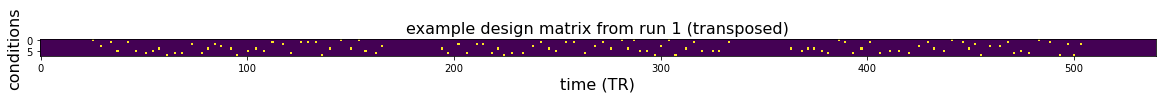

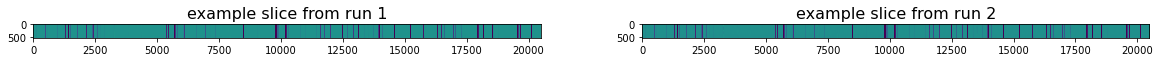

In [3]:
# plot example design matrix from run 1
plt.figure(figsize=(20,20))
plt.imshow(design[0].transpose() ,interpolation='none')
plt.title('example design matrix from run 1 (transposed)',fontsize=16)
plt.xlabel('time (TR)',fontsize=16);
plt.ylabel('conditions',fontsize=16)

# plot example slice from run 1
plt.figure(figsize=(20,6))
plt.subplot(121)
plt.imshow(data[0].transpose())
plt.title('example slice from run 1',fontsize=16)
plt.subplot(122)
plt.imshow(data[2].transpose())
plt.title('example slice from run 2',fontsize=16)


In [6]:
import numpy as np
n_trs = [100, 100, 100, 150]
n_cond = 8

design_ragged = []
design_balanced = []
for i in range(len(n_trs)):
    x = np.random.uniform(size = (n_trs[i], n_cond)) > 0.9  ## create random design matrix
    x = np.array(x, dtype = object)
    design_ragged.append(x)
    design_balanced.append(x[0:np.min(n_trs), :])

#np.unique(design_balanced)  ## this works
#np.unique(design_ragged) ## this fails
#np.unique([np.unique(x) for x in design_ragged])  ## this works
[x.dtype for x in design_ragged]

[dtype('O'), dtype('O'), dtype('O'), dtype('O')]

In [4]:
is_zero = []
for i in range(len(data)):
    is_zero.append(data[0] == 0)
idx = np.sum(np.array(is_zero), 0) == 0

In [5]:
import sys
print("Python version")
print (sys.version)
print("Version info.")
print (sys.version_info)

Python version
3.8.8 (default, Apr 13 2021, 19:58:26) 
[GCC 7.3.0]
Version info.
sys.version_info(major=3, minor=8, micro=8, releaselevel='final', serial=0)
